![Practicum AI Logo image](https://github.com/PracticumAI/practicumai.github.io/blob/main/images/logo/PracticumAI_logo_250x50.png?raw=true)
***
This exercise adapted from Baig et al. (2020) <i>The Deep Learning Workshop</i> from <a href="https://www.packtpub.com/product/the-deep-learning-workshop/9781839219856">Packt Publishers</a> (Exercise 7.04, page 348).

<div style="padding: 10px;margin-bottom: 20px;border: thin solid #30335D;border-left-width: 10px;background-color: #fff"><strong>Note:</strong> As this exercise builds on and extends exercise 7.03, these setup sections come from that earlier section. </div>


In [ ]:
# Import the required library functions

import tensorflow as tf
import numpy as np

from numpy.random import randn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot

In [2]:
def realData(loc, batch):
    '''Function to generate real samples. '''
    
    # loc is the random location or mean around which samples are centred
    # Generate numbers to right of the random point
    xr = np.arange(loc, loc + (0.1 * batch / 2), 0.1)
    xr = xr[0:int(batch / 2)]
    
    # Generate numbers to left of the random point
    xl = np.arange(loc - (0.1 * batch / 2), loc, 0.1)
    
    # Concatenating both these series 
    X1 = np.concatenate((xl, xr))
    
    # Second dependent variable
    X2 = np.sin(X1)
    
    # Reshaping both the variables and then concatenating them to an array of independent variables
    X1 = X1.reshape(batch, 1)
    X2 = X2.reshape(batch, 1)    
    X  = np.concatenate((X1, X2),axis = 1)
    
    # Generating the labels for the real data set which is 'ones'
    y = np.ones((batch, 1)) 
    
    return X,y

In [3]:
def fakeInputs(batch, infeats):
    '''Function to generate inputs for the generator function. '''
    
    # Sample data points equal to (batch x input feature size) from a random distribution
    genInput = randn(infeats * batch)
    
    # Reshape the input 
    X = genInput.reshape(batch ,infeats)
    
    return X

In [4]:
def genModel(infeats, outfeats):
    '''Function which instantiates the generator model. '''
    
    # Define and instantiate the Generator model
    Genmodel = Sequential()
    Genmodel.add(Dense(32,activation = 'linear', kernel_initializer = 'he_uniform', input_dim = infeats))
    Genmodel.add(Dense(32,activation = 'relu', kernel_initializer = 'he_uniform'))    
    Genmodel.add(Dense(64,activation = 'elu', kernel_initializer = 'he_uniform'))    
    Genmodel.add(Dense(32,activation = 'elu', kernel_initializer = 'he_uniform'))    
    Genmodel.add(Dense(32,activation = 'selu', kernel_initializer = 'he_uniform'))
    Genmodel.add(Dense(outfeats,activation = 'selu'))
    
    return Genmodel

In [5]:
# Function to create fake samples using the generator model
def fakedataGenerator(Genmodel, batch,infeats):
    ''' Function to create fake samples using the generator model. '''
    
    # First generate the inputs to the model
    genInputs = fakeInputs(batch,infeats)
    
    # Use these inputs inside the generator model to generate fake distribution
    X_fake = Genmodel.predict(genInputs)
    
    # Generate the labels of fake data set
    y_fake = np.zeros((batch,1))
    
    return X_fake, y_fake

In [6]:
# Define the arguments like batch size,input feature size and output feature size

batch    = 128
infeats  = 10
outfeats = 2

In [7]:
# Define the discriminator model

Discmodel = Sequential()
Discmodel.add(Dense(16, activation ='relu', kernel_initializer = 'he_uniform', input_dim = outfeats))
Discmodel.add(Dense(16, activation ='relu', kernel_initializer = 'he_uniform'))
Discmodel.add(Dense(16, activation ='relu', kernel_initializer = 'he_uniform'))    
Discmodel.add(Dense(1, activation ='sigmoid'))

# Compiling the model
Discmodel.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) 

In [8]:
# Print the summary of the discriminator model

Discmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                48        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Instantiate the generator model by calling the genModel() function.

Genmodel = genModel(infeats, outfeats)
Genmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 66        
Total params: 6,722
Trainable params: 6,722
Non-trainable params: 0
____________________________________________________

In [22]:
# Defining the number of epochs

nEpochs = 20000

In [24]:
# Train the discriminator network
for i in range(nEpochs):
    
    # Generate the random number for generating real samples
    loc = np.random.normal(3,1,1)
    
    # Generate samples equal to the bath size from the real distribution
    x_real, y_real = realData(loc, batch)
    
    # Generate fake samples using the fake data generator function
    x_fake, y_fake = fakedataGenerator(Genmodel, batch, infeats)
    
    # Train the  discriminator on the real samples
    Discmodel.train_on_batch(x_real, y_real)
    
    # Train the discriminator on the fake samples
    Discmodel.train_on_batch(x_fake, y_fake)
    
    # Print the accuracy measures on the real and fake data for every 4000 epochs
    if (i) % 4000 == 0:
        # Evaluate the real distribution accuracy
        _, realAccuracy = Discmodel.evaluate(x_real, y_real, verbose = 0)
        
        # Evaluate fake distribution accuracy levels
        _, fakeAccuracy = Discmodel.evaluate(x_fake, y_fake, verbose = 0)
        
        print('Real accuracy:{R},Fake accuracy:{F}'.format(R = realAccuracy, F = fakeAccuracy))

Real accuracy:0.0,Fake accuracy:0.984375
Real accuracy:1.0,Fake accuracy:0.9609375
Real accuracy:1.0,Fake accuracy:0.96875
Real accuracy:1.0,Fake accuracy:0.984375
Real accuracy:1.0,Fake accuracy:0.96875


-----------------------------------------------------------
#### Exercise 7.04 (Student)


<span style="color:steelblue">**(1)**</span>

In [ ]:
# Required libraries imported in the setup section above.

<span style="color:steelblue">**(2)**</span>

In [ ]:
# Function realData was created in the setup section above.

<span style="color:steelblue">**(3)**</span>

In [ ]:
# Function fakeInputs was created in the setup section above.

<span style="color:steelblue">**(4)**</span>

In [ ]:
# Function genModel was created in the setup section above.

<span style="color:steelblue">**(5)**</span>

In [ ]:
# Function fakedataGenerator was created in the setup section above.

<span style="color:steelblue">**(6)**</span>

In [ ]:
"""
Define the arguments like batch size,input feature size 
and output feature size
"""
batch = 128
infeats = 10
outfeats = 2

<span style="color:steelblue">**(7)**</span>

In [10]:
def discModel(outfeats):
    ''' Function which instantiates the discriminator model. '''
    Discmodel = Sequential()
    Discmodel.add(Dense(16, activation = 'relu',kernel_initializer = 'he_uniform',input_dim=outfeats))
    Discmodel.add(Dense(16,activation = 'relu' ,kernel_initializer = 'he_uniform'))
    Discmodel.add(Dense(16,activation = 'relu' ,kernel_initializer = 'he_uniform'))    
    Discmodel.add(Dense(1,activation = 'sigmoid'))
    
    # Compiling the model
    Discmodel.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])    
    return Discmodel 


<span style="color:steelblue">**(8)**</span>

In [11]:
# Print the summary of the discriminator model

Discmodel = discModel(outfeats)
Discmodel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                48        
_________________________________________________________________
dense_11 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_12 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 17        
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________


<span style="color:steelblue">**(9)**</span>

In [12]:
# Calling the Generator model function

Genmodel = genModel(infeats, outfeats)
Genmodel.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_15 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_16 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_17 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 66        
Total params: 6,722
Trainable params: 6,722
Non-trainable params: 0
____________________________________________________

<span style="color:steelblue">**(10)**</span>

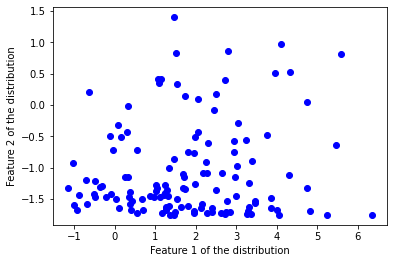

In [14]:
# Let's visualize the initial fake data
x_fake, _ = fakedataGenerator(Genmodel, batch, infeats)

# Plotting the fake data using pyplot
pyplot.scatter(x_fake[:, 0], x_fake[:, 1], color = 'blue')

# Adding x and y labels
pyplot.xlabel('Feature 1 of the distribution')
pyplot.ylabel('Feature 2 of the distribution')
pyplot.show()

<span style="color:steelblue">**(11)**</span>

In [14]:
def ganModel(Genmodel,Discmodel):
    ''' Function which instantiates the GAN model.'''
    
    # First define that discriminator model cannot be trained
    Discmodel.trainable = False
    Ganmodel = Sequential()
    
    # First adding the generator model
    Ganmodel.add(Genmodel)
    
    # Next adding the discriminator model without training the parameters
    Ganmodel.add(Discmodel)
    
    # Compile the model for loss to optimise the Generator model
    Ganmodel.compile(loss='binary_crossentropy',optimizer = 'adam')  
    
    return Ganmodel

<span style="color:steelblue">**(12)**</span>

In [15]:
# Initialise the gan model
gan_model = ganModel(Genmodel,Discmodel)

<span style="color:steelblue">**(13)**</span>

In [16]:
# Print summary of the GAN model
gan_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 2)                 6722      
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 609       
Total params: 7,331
Trainable params: 6,722
Non-trainable params: 609
_________________________________________________________________


<span style="color:steelblue">**(14)**</span>

In [21]:
# Defining the number of epochs
nEpochs = 20000

<span style="color:steelblue">**(15)**</span>

In [22]:
# Train the GAN network
for i in range(nEpochs):
    # Generate the random number for generating real samples
    loc = np.random.normal(3,1,1)
    
    # Generate samples equal to the bath size from the real distribution
    x_real, y_real = realData(loc,batch)
    
    # Generate fake samples using the fake data generator function
    x_fake, y_fake = fakedataGenerator(Genmodel,batch,infeats)
    
    # Train the  discriminator on the real samples
    Discmodel.train_on_batch(x_real, y_real)
    
    # Train the discriminator on the fake samples
    Discmodel.train_on_batch(x_fake, y_fake)
    
    # Generate new fake inputs for training the GAN network
    x_gan = fakeInputs(batch, infeats)
    
    # Create labels of the fake examples as 1 to fool the discriminator
    y_gan = np.ones((batch, 1))
    
    # Update the generator model through the discriminator model
    gan_model.train_on_batch(x_gan, y_gan)
    
    # Print the accuracy measures on the real and fake data for every 2000 epochs
    if (i) % 2000 == 0:
        # Generate samples equal to the bath size from the real distribution
        x_real, y_real = realData(loc,batch)
        
        # Evaluate Real distribution accuracy
        _, realAccuracy = Discmodel.evaluate(x_real, y_real, verbose = 0)
        
        # Generate fake samples using the fake data generator function
        x_fake,y_fake = fakedataGenerator(Genmodel,batch,infeats)
        
        # Evaluate fake distribution accuracy levels
        _, fakeAccuracy = Discmodel.evaluate(x_fake, y_fake, verbose = 0)
        
        print('Real accuracy:{R},Fake accuracy:{F}'.format(R = realAccuracy, F = fakeAccuracy))
        
        # Scatter plot real and fake data points
        pyplot.scatter(x_real[:, 0], x_real[:, 1], color = 'red')
        pyplot.scatter(x_fake[:, 0], x_fake[:, 1], color = 'blue')
        pyplot.xlabel('Feature 1 of the distribution')
        pyplot.ylabel('Feature 2 of the distribution')
        
        # Save plot to file
        filename = 'GAN_Training_Plot%03d.png' % (i)
        pyplot.savefig(filename)
        pyplot.close()

Real accuracy:0.5625,Fake accuracy:0.796875
Real accuracy:0.3203125,Fake accuracy:1.0
Real accuracy:0.5703125,Fake accuracy:0.890625
Real accuracy:0.3203125,Fake accuracy:0.7734375
Real accuracy:0.3125,Fake accuracy:0.8828125
Real accuracy:0.3125,Fake accuracy:0.953125
Real accuracy:0.375,Fake accuracy:0.890625
Real accuracy:0.40625,Fake accuracy:0.9453125
Real accuracy:0.4453125,Fake accuracy:0.90625
Real accuracy:0.390625,Fake accuracy:0.9296875
